## 개요
- 표준화
    - 머신러닝 작업 전 표준화 작업은 매우 중요!
    - 표준화는 outlier의 영향을 크게 받음.
    - 이상값에 영향을 크게 받지 않도록 표준화를 시키는 함수 
     - RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.
- 범주화
     - 연속형 범주를 이진화
     - binarize 
         - 0 아니면 1

- one hot encoding
    - 하나만 핫하게 하는 것. 나머지는 기본적인 상태
        - ex) 0부터 9까지 인식하는 숫자를 만들 때 하나만 1, 다른 나머지는 0


- interpolate => 보간법
- duplicate
- unique => 유일한 부서 확인.
- value_counts 

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing    
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [123]:
# 결측치 대체
df = pd.DataFrame(np.random.randn(5,3),
                 columns = ['c1', 'c2', 'c3']);df  
## 난수 생성시, 사용하는 함수로, 정규 분포를 따르는 난수 / (5,3)은 5행 3열로 정규분포 따르는 난수 생성 

,c1,c2,c3
0,-1.288840,0.494928,-1.127960
1,0.480902,-0.538582,-1.908355
2,-0.388545,1.035407,0.015605
3,-0.783030,0.820656,0.318528
4,0.643809,-1.007823,-1.476249


In [124]:
dfdate = ['07/3/2019', '07/4/2019', '07/5/2019', '07/6/2019'];dfdate
myDate = pd.to_datetime(dfdate);myDate # 문자 -> 날짜 데이터

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06'], dtype='datetime64[ns]', freq=None)

In [125]:
times = pd.Series([1, np.nan, np.nan, 20], index = myDate);times

2019-07-03     1.0
2019-07-04     NaN
2019-07-05     NaN
2019-07-06    20.0
dtype: float64

In [126]:
#보간법(interpolate)
ti = times.interpolate(); ti

2019-07-03     1.000000
2019-07-04     7.333333
2019-07-05    13.666667
2019-07-06    20.000000
dtype: float64

보간법
- 선형적으로 비례하게 NaN 값을 보간함.

In [127]:
times.interpolate

<bound method NDFrame.interpolate of 2019-07-03     1.0
2019-07-04     NaN
2019-07-05     NaN
2019-07-06    20.0
dtype: float64>

In [128]:
dfdate = ['07/3/2019', '07/4/2019', '07/5/2019', '07/10/2019'];dfdate
myDate = pd.to_datetime(dfdate);myDate # 문자 -> 날짜 데이터
times = pd.Series([1, np.nan, np.nan, 20], index = myDate);times

2019-07-03     1.0
2019-07-04     NaN
2019-07-05     NaN
2019-07-10    20.0
dtype: float64

In [129]:
# 시간에 대한 방법으로 값을 보간
ti = times.interpolate(method = 'time'); ti

2019-07-03     1.000000
2019-07-04     3.714286
2019-07-05     6.428571
2019-07-10    20.000000
dtype: float64

보간법2
- 시간을 기준으로 값을 보간함.
- 행 인덱스가 시계열로 구성되어 있을 때 사용 가능 옵션
- method = 'time'은 시간의 흐름에 따라 보간.
    - 계산 방법
        - 3일 ~ 10일까지는 총 8일
        - 3일은 1, 10일은 20 이므로 21을 8일로 나누면 1일에 대략 2.7일임
        - 따라서 7월 4일과 5일 2.7일을 더하며 보간이 가능.

In [130]:
df = pd.DataFrame({'c1' : [1,2, np.nan, np.nan, 5],
             'c2' : [6,8,10,np.nan, 20]});df

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,NaN,NaN
4,5.0,20.0


In [131]:
df.interpolate(method = 'values')

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,4.0,15.0
4,5.0,20.0


보간법3
- values 사용.
- 역시 선형적임.

In [132]:
df.interpolate(method = 'values', limit =1) # limit=1은 한 개만 바꾸겠다. / default는 'forward'임.

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,NaN,15.0
4,5.0,20.0


In [133]:
s = df.interpolate(method = 'values', limit =1, limit_direction='backward');s # backward로 설정 가능.

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,4.0,15.0
4,5.0,20.0


In [134]:
s.replace(np.nan, 10)  # nan을 10으로 대체

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,10.0,10.0
3,4.0,15.0
4,5.0,20.0


In [135]:
s

,c1,c2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,4.0,15.0
4,5.0,20.0


In [136]:
s.replace([1,2], [5,6]) # 1이라는 숫자는 5로, 2라는 숫자는 6으로 바꿔라.

,c1,c2
0,5.0,6.0
1,6.0,8.0
2,NaN,10.0
3,4.0,15.0
4,5.0,20.0


In [137]:
s.replace({1:10, np.nan : 999})   # 1은 10으로 바꾸고, nan은 999로 바꿔라.

,c1,c2
0,10.0,6.0
1,2.0,8.0
2,999.0,10.0
3,4.0,15.0
4,5.0,20.0


In [138]:
df = pd.DataFrame({'k1' : ['a','b','b','c','c'],
             'k2' : ['v','w','w','x','y'],
             'c' : [1,2,3,4,5]});df

,k1,k2,c
0,a,v,1
1,b,w,2
2,b,w,3
3,c,x,4
4,c,y,5


In [139]:
#duplicate
df.duplicated(['k1'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

- forward 방향으로 봤을 때 먼저 나온 값은 중복이 아니기 때문에 False가 나오고, 중복된 값이 나올 때 True로 바뀐다.

In [140]:
# 중복값 확인

In [141]:
df.duplicated(['k1'], keep = 'first') # 먼저 나오는 친구들은 중복으로 보지 않겠다. / keep = 'first'는 default

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [142]:
df.duplicated(['k1'], keep = 'last')  # 마지막에 나오는 친구들은 중복으로 보지 않겠다. / keep = 'last'

0    False
1     True
2    False
3     True
4    False
dtype: bool

In [143]:
df.duplicated(['k1'], keep = False)  # 중복된 값은 모두 True로 둔다.

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [144]:
# 중복값 제거 => 위 중복값 확인했을 때 True로 나오는 부분의 행은 제거한다.

In [145]:
df.drop_duplicates(['k1'], keep = 'first')   # 중복값을 제거한다. / #default

,k1,k2,c
0,a,v,1
1,b,w,2
3,c,x,4


In [146]:
df.drop_duplicates(['k1'], keep = 'last') 

,k1,k2,c
0,a,v,1
2,b,w,3
4,c,y,5


In [147]:
df.drop_duplicates(['k1'], keep = False)

,k1,k2,c
0,a,v,1


In [148]:
# value_counts
df = pd.DataFrame({
    's' : ['f', 'm', 'm', 'f', 'm'],
    'd' : ['a', 'a', 'a', 'a', np.nan],
    'c' : [1,1,3,4,4]
});df

,s,d,c
0,f,a,1
1,m,a,1
2,m,a,3
3,f,a,4
4,m,NaN,4


In [149]:
df.info()
df['s'].unique() 
df['d'].unique() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
s    5 non-null object
d    4 non-null object
c    5 non-null int64
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


array(['a', nan], dtype=object)

In [150]:
# value_count
print(df['s'].value_counts())
print("************************")
print(df['d'].value_counts())

m    3
f    2
Name: s, dtype: int64
************************
a    4
Name: d, dtype: int64


- value_counts()는 Series에서의 메서드에 해당.
    - 따라서 df.value_counts()는 말이 안됨.
    - nan은 결과가 나오지 않음.

In [151]:
df['s'].value_counts(normalize = True) # 빈도 확률로 나옴.

m    0.6
f    0.4
Name: s, dtype: float64

In [152]:
print(df['c'].value_counts(sort=True))  # default는 내림차순 정렬
print("******************************")
print(df['c'].value_counts(sort=True, ascending = True))

4    2
1    2
3    1
Name: c, dtype: int64
******************************
3    1
1    2
4    2
Name: c, dtype: int64


In [153]:
print(df['d'].value_counts(dropna = True))  # default
print("******************************")
print(df['d'].value_counts(dropna = False))  # nan 도 보여지도록.

a    4
Name: d, dtype: int64
******************************
a      4
NaN    1
Name: d, dtype: int64


In [154]:
#오후 연습문제
# 캐글 -> 타이타닉 -> 호칭 -> 호칭별 건수 -> 상위 10개 호칭 조사
# 나이(age) -> 구간화 -> 구간별 건수 -> sort -> sort 출력
# 시각화

In [175]:
df['c'].value_counts(sort = False, bins = [0,1,2,3,4])

(-0.001, 1.0]    2
(1.0, 2.0]       0
(2.0, 3.0]       1
(3.0, 4.0]       2
Name: c, dtype: int64

- bins는 구간을 의미
    - 0~1 / 1~2 / 2~3 / 3~4 구간으로.

In [185]:
res = pd.cut(df['c'], bins = [0,1,2,3,4]);res   # 해당 값의 구간들을 serial 형태로 출력.
print(res)
print("*************구분*************")
print(pd.value_counts(res))

0    (0, 1]
1    (0, 1]
2    (2, 3]
3    (3, 4]
4    (3, 4]
Name: c, dtype: category
Categories (4, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4]]
*************구분*************
(3, 4]    2
(0, 1]    2
(2, 3]    1
(1, 2]    0
Name: c, dtype: int64


- 정규분포 -> 선형변환 -> 표준정규분포
    - 선형변환
        - 원래 값에 (+, -, *, /) 등을 수행.
    - 표준정규분포
        - Zscore =  (x - x바) / Sx
        - 평군으로부터 자신의 값이 얼마 만큼 떨어져 있는지 확인.

# 표준정규분포
- standardScaler
- robustScaler

In [192]:
data = np.random.randint(20, size = (6,5));data

array([[10,  4, 17, 13,  6],
       [ 0, 15, 18, 12, 14],
       [12,  6, 14, 16,  1],
       [ 1,  1,  2,  8, 18],
       [ 5, 15, 11, 19,  9],
       [18, 15, 18, 11,  7]])

In [353]:
# 표준 정규화 방법1. - 평균으로 정규화
import numpy as np
#1. numpy 표준화
np.mean(data);data # 전체 평균
# 표준화 : (각 열의 데이터 - 각 열의 평균) / 표준편차
# Z = (x - mean()) / std()
print(np.mean(data, axis = 0))
print()
print(data - np.mean(data, axis = 0))
print()
print((data - np.mean(data, axis = 0)) / np.std(data, axis = 0 ))  
## 주의해야 할 것!!! => 각 열 별로 표준 편차를 구해야 하므로 axis= 0을 꼭 취해야 함.
std_data = (data - np.mean(data, axis = 0)) / np.std(data, axis = 0) # 각 열에 표준정규화 된 data

[ 7.66666667  9.33333333 13.33333333 13.16666667  9.16666667]

[[  2.33333333  -5.33333333   3.66666667  -0.16666667  -3.16666667]
 [ -7.66666667   5.66666667   4.66666667  -1.16666667   4.83333333]
 [  4.33333333  -3.33333333   0.66666667   2.83333333  -8.16666667]
 [ -6.66666667  -8.33333333 -11.33333333  -5.16666667   8.83333333]
 [ -2.66666667   5.66666667  -2.33333333   5.83333333  -0.16666667]
 [ 10.33333333   5.66666667   4.66666667  -2.16666667  -2.16666667]]

[[ 0.36791183 -0.91168461  0.64930947 -0.04719292 -0.57365434]
 [-1.20885316  0.9686649   0.82639387 -0.33035042  0.87557768]
 [ 0.68326483 -0.56980288  0.11805627  0.8022796  -1.47942436]
 [-1.05117666 -1.42450721 -2.00695654 -1.46298045  1.6001937 ]
 [-0.42047066  0.9686649  -0.41319694  1.65175212 -0.03019233]
 [ 1.62932383  0.9686649   0.82639387 -0.61350793 -0.39250034]]


In [354]:
np.mean(std_data, axis = 0)

array([-7.40148683e-17, -1.11022302e-16, -1.29526020e-16,  1.66533454e-16,
        8.32667268e-17])

In [355]:
np.std(std_data, axis= 0)

array([1., 1., 1., 1., 1.])

In [356]:
# 표준 정규화 방법2.- 평균으로 정규화
import scipy.stats as ss
ss.zscore(data)

array([[ 0.36791183, -0.91168461,  0.64930947, -0.04719292, -0.57365434],
       [-1.20885316,  0.9686649 ,  0.82639387, -0.33035042,  0.87557768],
       [ 0.68326483, -0.56980288,  0.11805627,  0.8022796 , -1.47942436],
       [-1.05117666, -1.42450721, -2.00695654, -1.46298045,  1.6001937 ],
       [-0.42047066,  0.9686649 , -0.41319694,  1.65175212, -0.03019233],
       [ 1.62932383,  0.9686649 ,  0.82639387, -0.61350793, -0.39250034]])

In [357]:
# 표준 정규화 방법3. - 평균으로 정규화
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data)
std_data

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.36791183, -0.91168461,  0.64930947, -0.04719292, -0.57365434],
       [-1.20885316,  0.9686649 ,  0.82639387, -0.33035042,  0.87557768],
       [ 0.68326483, -0.56980288,  0.11805627,  0.8022796 , -1.47942436],
       [-1.05117666, -1.42450721, -2.00695654, -1.46298045,  1.6001937 ],
       [-0.42047066,  0.9686649 , -0.41319694,  1.65175212, -0.03019233],
       [ 1.62932383,  0.9686649 ,  0.82639387, -0.61350793, -0.39250034]])

- 이상치, 특이값이 포함되어 있는 데이터의 표준화
- 평균, 표준편차는 이상치의 영향을 크게 받음(민감함)
- 중앙값, IQR(Q3 - Q1)
- robustscaler = (x - median()) / IQR (뒤에서 다시 설명)
    - 이상치를 제거 하면 좋지만, 부득이하게 제거가 어려울 때 robustscaler를 사용.
    - robustscaler는 '강인하다'는 뜻으로,
    - 이상치의 영향을 크게 받지 않음.
    

10.147389546015


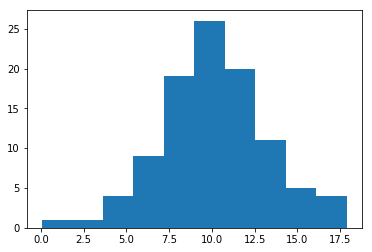

In [358]:
np.random.seed(73)  
mu, sigma = 10, 3
x = mu + sigma*np.random.randn(100);x
import matplotlib.pyplot as plt
plt.hist(x)
print(np.mean(x))
plt.show()

- seed 값을 꼭 줘야 모델의 변화를 확인할 수 있다.

In [359]:
np.std(x)

3.014695610662603

In [360]:
x[95:100] = 100; x

array([1.17304392e+01, 1.63933264e+01, 1.73206590e+01, 1.07899806e+01,
       5.51163806e+00, 9.88979408e+00, 1.12920874e+01, 5.41157701e+00,
       7.80922097e+00, 1.31539457e+01, 1.48593780e+01, 5.18495989e+00,
       1.09930286e+01, 9.36714293e+00, 1.08945301e+01, 6.56177945e+00,
       1.17260861e+01, 8.90828010e+00, 1.01091976e+01, 8.43830804e+00,
       9.95270700e+00, 9.86247581e+00, 8.14476643e+00, 7.54049167e+00,
       1.15294257e+01, 1.31518183e+01, 1.04350957e+01, 8.97743181e+00,
       1.37323753e+01, 1.49674550e+01, 9.18100947e+00, 8.92022193e+00,
       7.33842885e-02, 1.31550968e+01, 9.32104691e+00, 8.01247213e+00,
       1.27391756e+01, 1.27635065e+01, 1.27163572e+01, 8.54749669e+00,
       7.85535142e+00, 1.05471619e+01, 1.17301502e+01, 5.30930238e+00,
       1.56590461e+01, 6.80288206e+00, 1.03384932e+01, 8.23193967e+00,
       1.19328003e+01, 1.09154191e+01, 1.18521557e+01, 1.32972652e+01,
       8.69230361e+00, 1.11955065e+01, 1.00184890e+01, 4.93669823e+00,
      

(array([ 1.,  1.,  7.,  8., 29., 25., 14.,  6.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

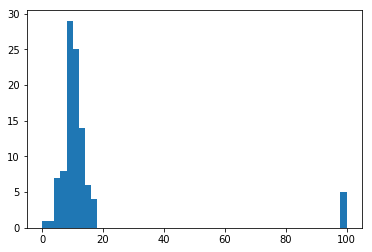

In [361]:
# 이상치의 요상함.
plt.hist(x, bins = np.arange(0,101, 2))   # bins를 사용하여, 이상치 값을 쉽게 확인해본다.

In [362]:
print(np.shape(x))
x = x.reshape(-1, 1)   # -1 : 니가 알아서 계산해.(난 하기 싫어.)
print(np.shape(x))

(100,)
(100, 1)


cf. Deep Learning에서 -1 => None

In [363]:
#  StandardScaler()
# 잘못된 표준화 -> 왜냐하면 전체로 하면 안되고, 열마다 서로 다르게 해야 함.
#그러나 RobustScaler()와 비교를 하기 위해 그냥 하는 것임.
std_x = StandardScaler().fit_transform(x); std_x

array([[-0.15094936],
       [ 0.08465915],
       [ 0.13151584],
       [-0.19846928],
       [-0.46517581],
       [-0.24395432],
       [-0.1730986 ],
       [-0.47023174],
       [-0.34908248],
       [-0.07902176],
       [ 0.0071511 ],
       [-0.48168235],
       [-0.18820958],
       [-0.27036308],
       [-0.19318656],
       [-0.41211378],
       [-0.15116931],
       [-0.29354871],
       [-0.2328682 ],
       [-0.31729568],
       [-0.24077543],
       [-0.24533467],
       [-0.33212788],
       [-0.36266096],
       [-0.16110626],
       [-0.07912926],
       [-0.21640107],
       [-0.29005458],
       [-0.04979461],
       [ 0.01261207],
       [-0.27976812],
       [-0.29294531],
       [-0.7399624 ],
       [-0.0789636 ],
       [-0.27269224],
       [-0.33881251],
       [-0.09997946],
       [-0.09875006],
       [-0.10113244],
       [-0.31177854],
       [-0.34675158],
       [-0.21073854],
       [-0.15096396],
       [-0.47539952],
       [ 0.0475571 ],
       [-0

In [322]:
print(np.mean(std_x))
print(np.std(std_x))

5.329070518200751e-17
1.0


(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([-0.7399624 , -0.23504859,  0.26986522,  0.77477902,  1.27969283,
         1.78460664,  2.28952044,  2.79443425,  3.29934806,  3.80426186,
         4.30917567]),
 <a list of 10 Patch objects>)

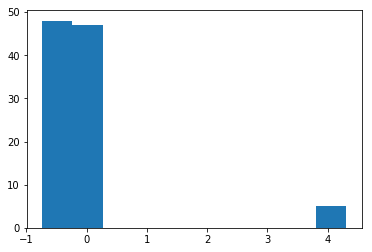

In [323]:
plt.hist(std_x)

In [330]:
std_o = std_x[std_x < 4];std_o # 이상치 값을 제거.

array([-0.15094936,  0.08465915,  0.13151584, -0.19846928, -0.46517581,
       -0.24395432, -0.1730986 , -0.47023174, -0.34908248, -0.07902176,
        0.0071511 , -0.48168235, -0.18820958, -0.27036308, -0.19318656,
       -0.41211378, -0.15116931, -0.29354871, -0.2328682 , -0.31729568,
       -0.24077543, -0.24533467, -0.33212788, -0.36266096, -0.16110626,
       -0.07912926, -0.21640107, -0.29005458, -0.04979461,  0.01261207,
       -0.27976812, -0.29294531, -0.7399624 , -0.0789636 , -0.27269224,
       -0.33881251, -0.09997946, -0.09875006, -0.10113244, -0.31177854,
       -0.34675158, -0.21073854, -0.15096396, -0.47539952,  0.0475571 ,
       -0.39993123, -0.22128225, -0.32772315, -0.14072436, -0.19213107,
       -0.14479921, -0.07178005, -0.30446167, -0.17797868, -0.23745157,
       -0.49422663, -0.23757914, -0.1187538 , -0.14885864, -0.39540999,
       -0.0806203 , -0.33765531, -0.33539694, -0.17154068, -0.28690257,
       -0.02598362, -0.21000934, -0.08832732, -0.24263435, -0.21

(array([ 0.,  1.,  9., 45., 32.,  8.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01]),
 <a list of 9 Patch objects>)

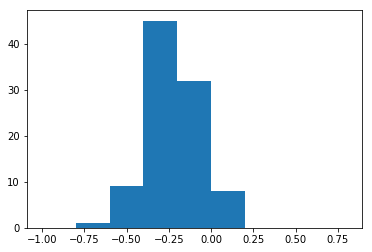

In [336]:
plt.hist(std_o, bins = np.arange(-1,1, 0.2))

In [367]:
# 표준 정규화 방법1.- 중위수로 정규화
x
np.mean(x)  # 14.7
np.median(x) # 10.3 
Q1 = np.percentile(x, 25)   # 25% 지점의 수
Q3 = np.percentile(x, 75) 
IQR = Q3 - Q1; IQR
print((x - np.median(x)) / IQR)

[[ 3.27865765e-01]
 [ 1.46566736e+00]
 [ 1.69194788e+00]
 [ 9.83823630e-02]
 [-1.18959787e+00]
 [-1.21274179e-01]
 [ 2.20902557e-01]
 [-1.21401399e+00]
 [-6.28959499e-01]
 [ 6.75218799e-01]
 [ 1.09136517e+00]
 [-1.26931134e+00]
 [ 1.47928556e-01]
 [-2.48807460e-01]
 [ 1.23893718e-01]
 [-9.33350510e-01]
 [ 3.26803559e-01]
 [-3.60775612e-01]
 [-6.77370358e-02]
 [-4.75454548e-01]
 [-1.05922655e-01]
 [-1.27940169e-01]
 [-5.47082297e-01]
 [-6.94532739e-01]
 [ 2.78816023e-01]
 [ 6.74699692e-01]
 [ 1.17861007e-02]
 [-3.43901747e-01]
 [ 8.16362710e-01]
 [ 1.11773727e+00]
 [-2.94226304e-01]
 [-3.57861657e-01]
 [-2.51659840e+00]
 [ 6.75499676e-01]
 [-2.60055454e-01]
 [-5.79363727e-01]
 [ 5.74009819e-01]
 [ 5.79946854e-01]
 [ 5.68441851e-01]
 [-4.48811180e-01]
 [-6.17703105e-01]
 [ 3.91316169e-02]
 [ 3.27795259e-01]
 [-1.23897026e+00]
 [ 1.28649398e+00]
 [-8.74518518e-01]
 [-1.17861007e-02]
 [-5.25810959e-01]
 [ 3.77244364e-01]
 [ 1.28990877e-01]
 [ 3.57566101e-01]
 [ 7.10190508e-01]
 [-4.1347652

- robustscaler = (x - median()) / IQR (뒤에서 다시 설명)
    - 이상치를 제거 하면 좋지만, 부득이하게 제거가 어려울 때 robustscaler를 사용.
    - robustscaler는 '강인하다'는 뜻으로,
    - 이상치의 영향을 크게 받지 않음.
    - standscaler보다 이상치 면에서는 좋음.

In [352]:
# 표준 정규화 방법2.- 중위수로 정규화
rbs_x = RobustScaler().fit_transform(x); rbs_x

array([[ 3.27865765e-01],
       [ 1.46566736e+00],
       [ 1.69194788e+00],
       [ 9.83823630e-02],
       [-1.18959787e+00],
       [-1.21274179e-01],
       [ 2.20902557e-01],
       [-1.21401399e+00],
       [-6.28959499e-01],
       [ 6.75218799e-01],
       [ 1.09136517e+00],
       [-1.26931134e+00],
       [ 1.47928556e-01],
       [-2.48807460e-01],
       [ 1.23893718e-01],
       [-9.33350510e-01],
       [ 3.26803559e-01],
       [-3.60775612e-01],
       [-6.77370358e-02],
       [-4.75454548e-01],
       [-1.05922655e-01],
       [-1.27940169e-01],
       [-5.47082297e-01],
       [-6.94532739e-01],
       [ 2.78816023e-01],
       [ 6.74699692e-01],
       [ 1.17861007e-02],
       [-3.43901747e-01],
       [ 8.16362710e-01],
       [ 1.11773727e+00],
       [-2.94226304e-01],
       [-3.57861657e-01],
       [-2.51659840e+00],
       [ 6.75499676e-01],
       [-2.60055454e-01],
       [-5.79363727e-01],
       [ 5.74009819e-01],
       [ 5.79946854e-01],
       [ 5.6

In [382]:
np.median(rbs_x)  
## median을 기준으로 했기 때문에 0이 나옴.(cf. standscaler는 평균을 기준으로 했기 때문에 평균이 0)

0.0

In [372]:
np.mean(rbs_x)

1.0568310264435923

In [374]:
np.std(rbs_x)

4.829204078863935

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.,  2.,  4.,  4., 11.,
        12., 10., 11., 10.,  7.,  6.,  2.,  4.,  1.,  2.,  1.,  1.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <a list of 29 Patch objects>)

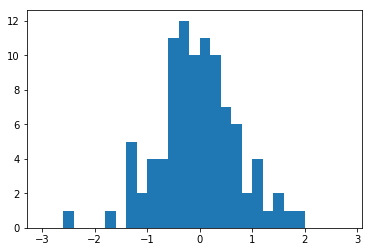

In [381]:
rbs_o = rbs_x[rbs_x < 5];rbs_o  # robustscaler 표준 정규 값이 5보다 작은 값들만 추출.
plt.hist(rbs_o, bins = np.arange(-3, 3, 0.2))  # -3 ~ 3까지 0.2 간격으로.

# 정규화
- (각 열의 요소값 - 각 열의 최솟값) / (각 열의 최대값 - 각 열의 최솟값)
- 0~1 사이의 범위(딥러닝에서 많이 사용)
- 연습문제 : 관심 회사 -> 주식 데이터 다운로드(1개월) -> 표준화/정규화
     - def myStd 활용

In [408]:
# 정규화 방법1. 기본 정석으로.
x = np.array([
        [9, -9, 2],
        [5,  0, 1],
        [1, 10, 4],
        [4,  7,-2]
]);print(x, '\n') 
(x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis = 0))

[[ 9 -9  2]
 [ 5  0  1]
 [ 1 10  4]
 [ 4  7 -2]] 



array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

- 0열을 보면 9는 1 / 1은 0
- 1열을 보면 10은 1 / -9는 0
...

In [409]:
# 정규화 방법2. MinMaxScaler() 사용
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(x)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [410]:
# 정규화 방법3. minmax_scale() 사용
from sklearn.preprocessing import minmax_scale
minmax_scale(x, axis = 0)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [412]:
# 연습문제 : 이항변수화 변환(타이타닉)
# 연속형 변수 값 -> 0 또는 1(2가지) => Threshold를 사용해서 0과 1로 구분한다.
from sklearn.preprocessing import Binarizer # 이항변수화 시키는 클래스

In [415]:
x = np.array([[5, -3, 2],
         [7, -1, 0],
         [0, 9, 5]]);x

array([[ 5, -3,  2],
       [ 7, -1,  0],
       [ 0,  9,  5]])

In [417]:
# 3을 기준(threshold)
Binarizer().fit(x)  # threshold의 default는 0

Binarizer(copy=True, threshold=0.0)

In [424]:
Binarizer(2).fit(x) # threshold 값이 2

Binarizer(copy=True, threshold=2)

In [425]:
bnr = Binarizer(2).fit(x)

In [426]:
bnr.transform(x)  

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

- 2이하는 0으로, 2초과는 1로